In [21]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.models import load_model
from keras import backend as K
K.set_image_dim_ordering('th')
import numpy as np
import os
import glob
import cv2
import pickle
import datetime
import pandas as pd
import time
from shutil import copy2
import warnings
warnings.filterwarnings("ignore")
from numpy.random import permutation
np.random.seed(2016)
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.utils import np_utils
from keras.models import model_from_json
from keras.models import load_model
import h5py
import cv2


# VGG16 metrics

In [2]:
model16 = load_model("weights-16.h5")

In [12]:
X_test = np.zeros(shape=(5606,3,224,224))
y_test = np.zeros(shape=(5606))

## Image Reading

In [26]:
#image reading
from keras.preprocessing import image as image_utils
i = 0
for f in range(10):
    folder = "Test Data/c{}/*".format(f)
    imgs = glob.glob(folder)
    for image in imgs:
        img = load_img(image,target_size=(224,224))
        x = img_to_array(img)
#         x = x.reshape((3,224,224))
        X_test[i] = x
        y_test[i] = f
        i = i+1
        if i%500 == 0:
            print(i)
        

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500


In [28]:
y_test

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [30]:
#image normalisation
mean_pixel = [103.939, 116.779, 123.68]
x[0, :, :] -= mean_pixel[0]
x[1, :, :] -= mean_pixel[1]
x[2, :, :] -= mean_pixel[2]
X_test[:,0,:,:] -= mean_pixel[0]
X_test[:,1,:,:] -= mean_pixel[1]
X_test[:,2,:,:] -= mean_pixel[2]

In [38]:
y_pred = model16.predict_classes(X_test)

5606/5606 [==============================] - 205s     

In [39]:
y_pred

array([0, 0, 0, ..., 9, 9, 9])

In [79]:
testCat = np_utils.to_categorical(y_test)

In [43]:
from sklearn.metrics import accuracy_score

## Accuracy vgg16


In [44]:
#accuracy vgg16
accuracy_score(y_test,y_pred)

0.99571887263646097

## Loss vgg16


In [80]:
#loss vgg16

model16.evaluate(X_test,testCat)

5606/5606 [==============================] - 202s     

[0.019622771594898447, 0.99571887263646097]

## Confusion matrix vgg16


Confusion matrix, without normalization
[[619   1   0   0   0   0   0   0   1   1]
 [  0 565   0   0   0   0   0   0   0   0]
 [  0   0 578   0   0   0   0   0   1   0]
 [  0   0   0 587   0   0   0   0   0   0]
 [  0   1   0   0 580   0   0   0   0   0]
 [  4   0   1   0   0 572   0   0   1   0]
 [  0   1   0   0   0   0 577   0   3   0]
 [  0   0   0   0   0   0   0 500   0   1]
 [  0   0   0   0   0   0   0   0 476   2]
 [  2   0   0   0   2   0   0   0   2 528]]


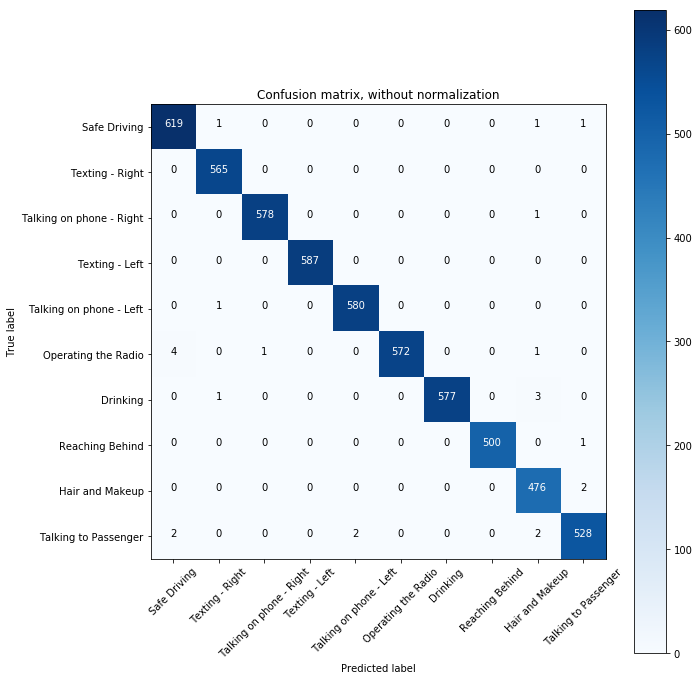

In [60]:
#confusion matrix vgg16
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ["Safe Driving","Texting - Right","Talking on phone - Right","Texting - Left","Talking on phone - Left"
              ,"Operating the Radio", "Drinking", "Reaching Behind", "Hair and Makeup","Talking to Passenger"
              ]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# plt.figure()
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plt.figure(figsize=(8,8))
# np.set_printoptions(precision=2)

# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

# VGG19 metrics

In [61]:
model19 = load_model("weights-19.h5")

In [62]:
y_pred = model19.predict_classes(X_test)

5606/5606 [==============================] - 235s     

In [63]:
y_pred

array([0, 0, 0, ..., 9, 9, 9])

## Accuracy vgg19

In [64]:
#accuracy vgg19
accuracy_score(y_test,y_pred)

0.9898323225115947

## Loss vgg19

In [81]:
#loss vgg19
model19.evaluate(X_test,testCat)

5606/5606 [==============================] - 235s     

[0.046138125962606281, 0.9898323225115947]

## Confusion Matrix VGG19

Confusion matrix, without normalization
[[615   1   0   0   1   0   1   0   0   4]
 [  0 564   0   0   0   0   1   0   0   0]
 [  0   0 578   0   0   0   1   0   0   0]
 [  0   0   1 586   0   0   0   0   0   0]
 [  1   0   0   0 578   0   2   0   0   0]
 [  3   0   1   0   0 573   0   1   0   0]
 [  0   0   0   0   0   0 581   0   0   0]
 [  0   0   1   0   0   0   0 499   0   1]
 [  0   1  10   0   0   0  14   2 446   5]
 [  1   1   0   0   1   0   0   0   2 529]]


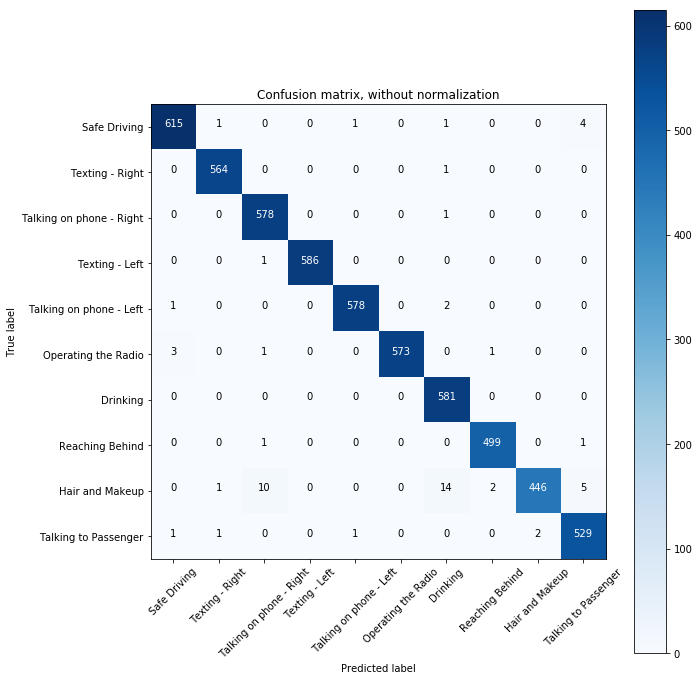

In [67]:
#confusion matrix vgg19
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ["Safe Driving","Texting - Right","Talking on phone - Right","Texting - Left","Talking on phone - Left"
              ,"Operating the Radio", "Drinking", "Reaching Behind", "Hair and Makeup","Talking to Passenger"
              ]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# plt.figure()
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plt.figure(figsize=(8,8))
# np.set_printoptions(precision=2)

# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

# Output VGG16

In [68]:
#vgg 16 output
%%bash
cat codeOp16

Model loaded.
Found 15137 images belonging to 10 classes.
Found 1681 images belonging to 10 classes.
Epoch 1/1
15137/15137 [==============================] - 2105s - loss: 2.2882 - acc: 0.1354 - val_loss: 7.6541 - val_acc: 0.1130
0
Epoch 1/1
15137/15137 [==============================] - 2097s - loss: 0.9527 - acc: 0.6474 - val_loss: 0.1695 - val_acc: 0.9429
1
Epoch 1/1
15137/15137 [==============================] - 2099s - loss: 0.1990 - acc: 0.9372 - val_loss: 0.0640 - val_acc: 0.9798
2
Epoch 1/1
15137/15137 [==============================] - 2102s - loss: 0.1038 - acc: 0.9682 - val_loss: 0.0553 - val_acc: 0.9833
3
Epoch 1/1
15137/15137 [==============================] - 2101s - loss: 0.0782 - acc: 0.9778 - val_loss: 0.0286 - val_acc: 0.9911
4
Epoch 1/1
15137/15137 [==============================] - 2100s - loss: 0.0510 - acc: 0.9849 - val_loss: 0.0240 - val_acc: 0.9958
5
Epoch 1/1
15137/15137 [==============================] - 2100s - loss: 0.0417 - acc: 0.9872 - val_loss: 0.0203 - 

# Output VGG19

In [69]:
#vgg 19 output
%%bash
cat codeOp19

Model loaded.
Found 15137 images belonging to 10 classes.
Found 1681 images belonging to 10 classes.
Epoch 1/1
15137/15137 [==============================] - 2371s - loss: 1.5287 - acc: 0.4370 - val_loss: 0.1919 - val_acc: 0.9435
0
Epoch 1/1
15137/15137 [==============================] - 2363s - loss: 0.2184 - acc: 0.9354 - val_loss: 0.0767 - val_acc: 0.9774
1
Epoch 1/1
15137/15137 [==============================] - 2371s - loss: 0.1094 - acc: 0.9661 - val_loss: 0.0534 - val_acc: 0.9863
2
Epoch 1/1
15137/15137 [==============================] - 2370s - loss: 0.0702 - acc: 0.9793 - val_loss: 0.0321 - val_acc: 0.9917
3
Epoch 1/1
15137/15137 [==============================] - 2366s - loss: 0.0478 - acc: 0.9865 - val_loss: 0.0133 - val_acc: 0.9958
4
Epoch 1/1
15137/15137 [==============================] - 2367s - loss: 0.0426 - acc: 0.9870 - val_loss: 0.0264 - val_acc: 0.9935
5
Epoch 1/1
15137/15137 [==============================] - 2342s - loss: 0.0353 - acc: 0.9898 - val_loss: 0.0291 - 